### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

[Link](https://eu.udacity.com/course/programming-for-data-science-nanodegree--nd104) to the Programming for Data Science with RNano Degree.

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What is the most common month of travel in NYC?**

In [5]:
# Your solution code goes here
#Adding new columns
ny2 = transform(ny,Start.Year=as.numeric(substr(ny$Start.Time, 1, 4)))
ny2 = transform(ny2,Start.Month=as.numeric(substr(ny$Start.Time, 6, 7)))
ny2 = transform(ny2,Start.Day=as.numeric(substr(ny$Start.Time, 9, 10)))


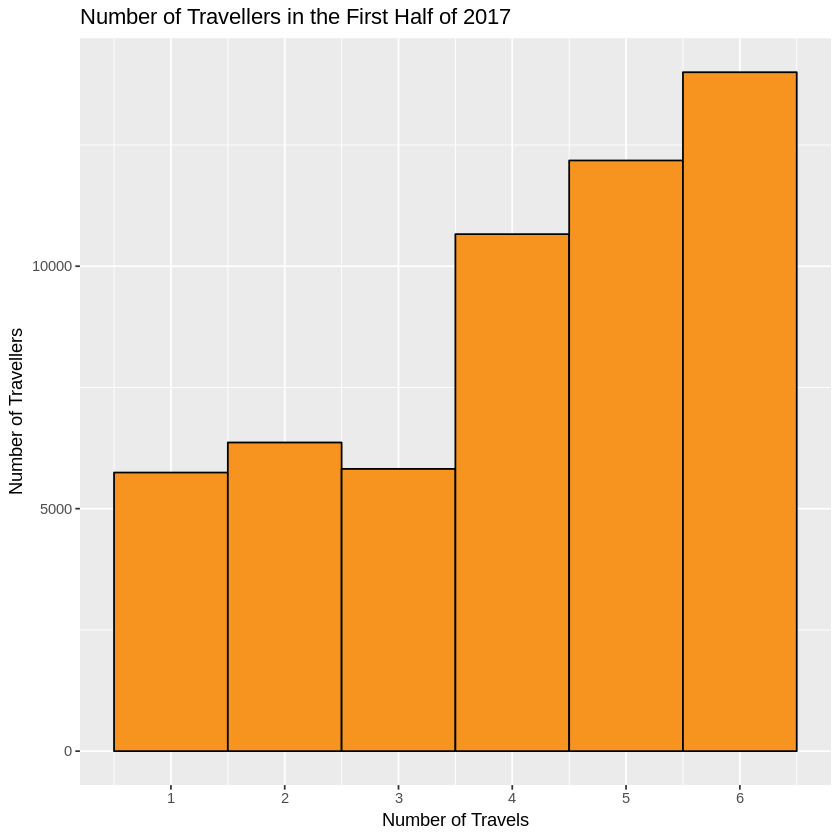

In [6]:
#Creating the chart
library(ggplot2)
ggplot(aes(x=Start.Month), data=ny2) + 
  geom_histogram(binwidth=1,color = 'black', fill = '#F79420') +
  scale_x_continuous(breaks=1:12) +
  xlab('Number of Travels') +
  ylab('Number of Travellers') +
  ggtitle('Number of Travellers in the First Half of 2017')



In [7]:
#Exact numbers
table(ny2$Start.Month)


    1     2     3     4     5     6 
 5745  6364  5820 10661 12180 14000 

In [8]:
max(table(ny2$Start.Month))

[1] 14000

**Summary:**
In New-York City the most common month of travel was June (in the first half year of 2017). There are 14000 travels registered in that month.

In the bar chart above you can see the number of travellers for each month. It can be seen that the highest bar belongs to June.

Also, we can notice that in the first three months the number of travels are significantly lower. Most probably because of the worse weather conditions (winter + early spring).

### Question 2

**What is the average travel time for users in different cities?**

In [9]:
# Your solution code goes here
#Calculating the means and creating new data frame
means = c(mean(ny$Trip.Duration,na.rm=TRUE),
          mean(wash$Trip.Duration,na.rm=TRUE),
          mean(chi$Trip.Duration,na.rm=TRUE))
cities = c('New York','Washington','Chicago')
means_df = data.frame(cities,means)


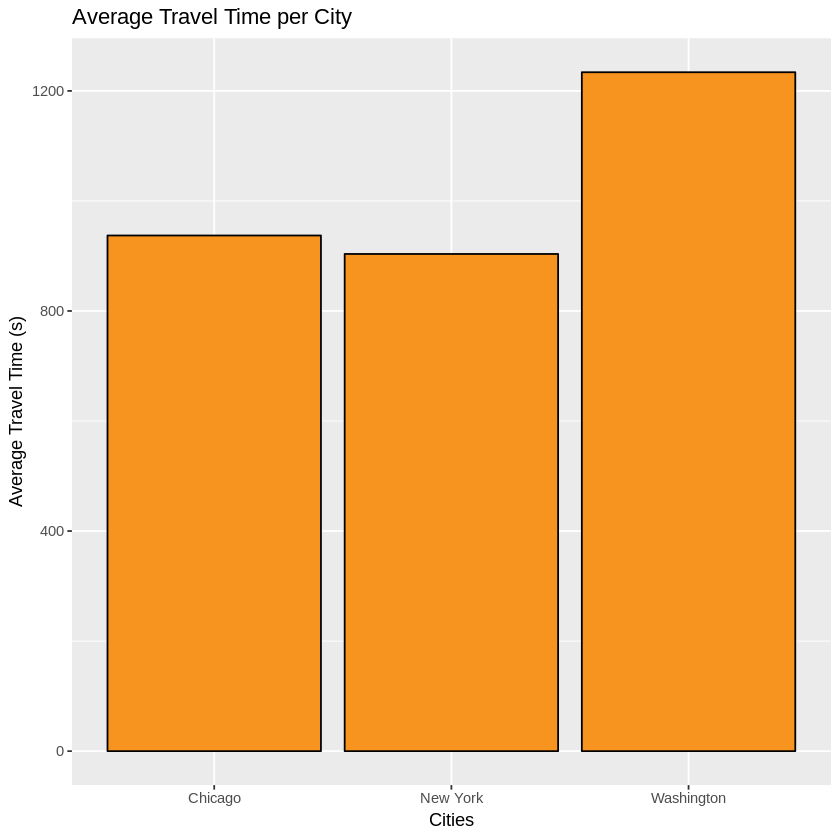

In [10]:
#Creating the chart
library(ggplot2)
ggplot(data=means_df)+ 
  geom_bar(mapping = aes(x = cities, y = means), stat = "identity", 
           color = 'black', fill = '#F79420')+
  xlab('Cities') +
  ylab('Average Travel Time (s)') +
  ggtitle('Average Travel Time per City')


In [11]:
#Printing out exact numbers
print(means_df)

      cities     means
1   New York  903.6147
2 Washington 1233.9533
3    Chicago  937.1728


**Summary:**

The average travel time is ~903 seconds in New York, ~937 seconds in Chicago and ~1233 seconds in Washington. The same can be seen on the bar chart above.

Interestingly in Washington the cyclers use the bycicle 25% longer. One possible reason is that the distance are bigger, because there are less sky-scrapers in Washington.



### Question 3

**What are the counts of each user type per city?**

In [12]:
# Your solution code goes here
# Creating a new data frame containing all the three cities
ny = transform(ny,City='New York')
chi = transform(chi, City='Chicago')
wash = transform(wash, City='Washington')
wash$Gender = NA
wash$Birth.Year = NA
cities = rbind(ny,chi,wash)


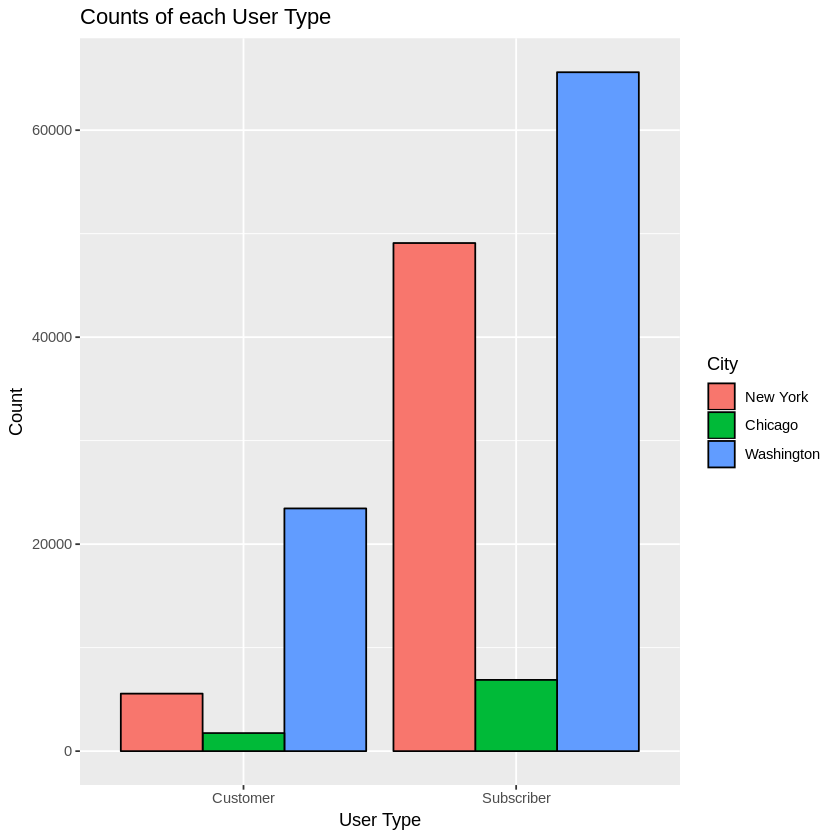

In [13]:
# Creating the chart
library(ggplot2)
ggplot(data=subset(cities,User.Type!=""))+ 
  geom_bar(mapping = aes(x = User.Type, fill = City), 
           color='black', position = "dodge")+
  xlab('User Type') +
  ylab('Count') +
  ggtitle('Counts of each User Type')


In [14]:
#The exact numbers
"New York:"
table(subset(ny,User.Type!='')$User.Type)[2:3]
"Chicago:"
table(subset(chi,User.Type!='')$User.Type)[2:3]
"Washington:"
table(subset(wash,User.Type!='')$User.Type)[2:3]

[1] "New York:"


  Customer Subscriber 
      5558      49093 

[1] "Chicago:"


  Customer Subscriber 
      1746       6883 

[1] "Washington:"


  Customer Subscriber 
     23450      65600 

**Summary:**
The answer:
* New York: 5558 Customers, 49093 Subscribers
* Chicago: 1746 Customers, 6883 Subscribers
* Washington: 23450 Customers, 65600 Subscribers

We can see that in each city there are significantly more Subscribers than Customers. However the ratio varies from ~11% (NY) through ~25% (CHI) to ~35% (WASH). 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [15]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')